In [1]:
import matplotlib
# !pip install opencv-python
import matplotlib.pyplot as ajeeb
import cv2
import math
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy import linalg
from scipy.linalg import null_space
# !pip install imageio
import imageio

import numpy as np
import tkinter as tk
from PIL import Image, ImageTk
import matplotlib.pyplot as plt

In [2]:
# image1 = cv2.imread('motorwaydash.jpeg')
# image2 = cv2.imread('motorwayhaha.jpeg')

image1 = cv2.imread('dashlums.jpeg')
image2 = cv2.imread('toplums.jpeg')

image1_resized = cv2.resize(image1, (500, 500))
image2_resized = cv2.resize(image2, (500, 500))

# image1_resized = cv2.cvtColor(image1_resized, cv2.COLOR_BGR2GRAY)
# image2_resized = cv2.cvtColor(image2_resized, cv2.COLOR_BGR2GRAY)

# image1_resized = cv2.normalize(image1_resized, None, 0, 255, cv2.NORM_MINMAX)
# image2_resized = cv2.normalize(image2_resized, None, 0, 255, cv2.NORM_MINMAX)

cv2.imwrite('image1_processed.jpeg', image1_resized)
cv2.imwrite('image2_processed.jpeg', image2_resized)

True

In [3]:

def point_reader(image):
    image_copy = image.copy()
    cv2.namedWindow('Select Points')
    points = []
    def mouse_callback(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            cv2.circle(image_copy, (x, y), 5, (0, 255, 0), -1)
            points.append((x, y))
    cv2.setMouseCallback('Select Points', mouse_callback)
    while True:
        cv2.imshow('Select Points', image_copy)
        key = cv2.waitKey(1) & 0xFF
        if key == ord('q') or cv2.getWindowProperty('Select Points', cv2.WND_PROP_VISIBLE) < 1:
            break
    cv2.destroyAllWindows()

    return np.array(points)



In [4]:
# im1= cv2.imread('preprocessed_normalized_image1.jpg')
# im2= cv2.imread('preprocessed_normalized_image2.jpg')
points_image1 = point_reader(image1_resized)


In [5]:
points_image2 = point_reader(image2_resized)

In [6]:
matrixx = np.zeros((8, 9))
for i in range(len(points_image1)):
    x, y = points_image1[i]
    X, Y = points_image2[i]
    matrixx[2 * i] = [-x, -y, -1, 0, 0, 0, x * X, y * X, X]
    matrixx[2 * i + 1] = [0, 0, 0, -x, -y, -1, x * Y, y * Y, Y]

print(matrixx)

[[-1.67000e+02 -3.13000e+02 -1.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00  3.10620e+04  5.82180e+04  1.86000e+02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00 -1.67000e+02 -3.13000e+02
  -1.00000e+00  2.67200e+04  5.00800e+04  1.60000e+02]
 [-2.73000e+02 -3.13000e+02 -1.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00  6.60660e+04  7.57460e+04  2.42000e+02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00 -2.73000e+02 -3.13000e+02
  -1.00000e+00  4.31340e+04  4.94540e+04  1.58000e+02]
 [-4.78000e+02 -4.07000e+02 -1.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00  1.17588e+05  1.00122e+05  2.46000e+02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00 -4.78000e+02 -4.07000e+02
  -1.00000e+00  1.50092e+05  1.27798e+05  3.14000e+02]
 [-2.40000e+01 -4.14000e+02 -1.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00  4.63200e+03  7.99020e+04  1.93000e+02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00 -2.40000e+01 -4.14000e+02
  -1.00000e+00  7.63200e+03  1.31652e+05  3.18000e+02]]


In [7]:
u, s, vh = np.linalg.svd(matrixx) # Replace it with your H matrix
vh = np.transpose(vh)
P = vh[:, -1]
P = P.reshape(3, 3)
P = P / P[2, 2]
# P=P.T
# P=np.transpose(P)
print("Homography matrix\n",P)

Homography matrix
 [[-5.03986700e-02 -7.54997173e-01  2.26790286e+02]
 [ 2.18423348e-03 -1.26319415e+00  3.79582393e+02]
 [ 2.30601531e-06 -3.50427766e-03  1.00000000e+00]]


In [8]:
# result_image = cv2.warpPerspective(image1_resized, P, (image1_resized.shape[1] + image2_resized.shape[1], image1_resized.shape[0]))
# result_image[0:image2_resized.shape[0], 0:image2_resized.shape[1]] = image2_resized


result_image = cv2.warpPerspective(image1_resized, P, (image1_resized.shape[0], image1_resized.shape[1]))

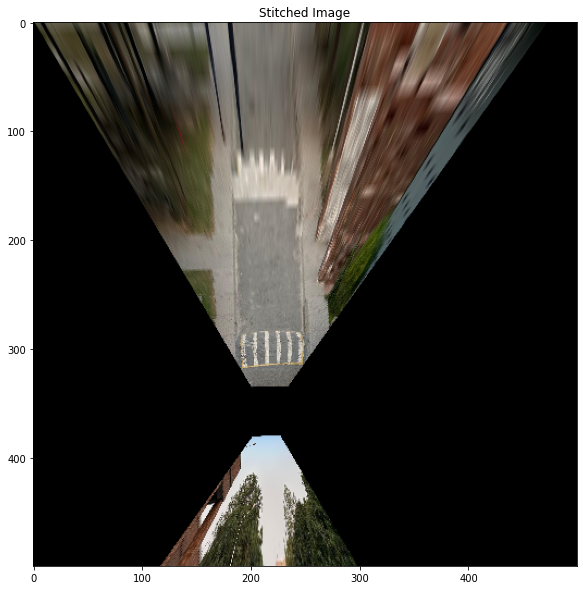

In [9]:

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Stitched Image')
plt.show()